Example for channel capacity

In [1]:
# A few important packages that we will need
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

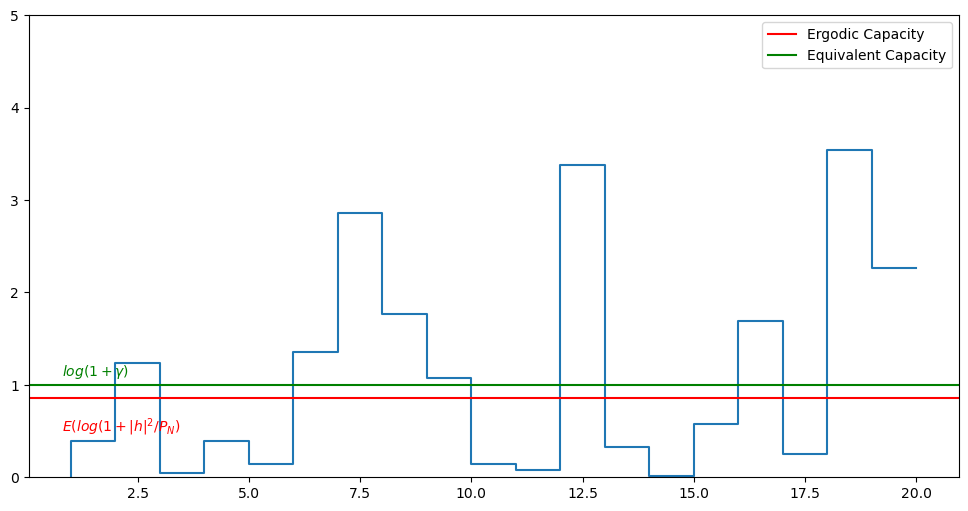

In [63]:
N = 20; # number of channel realizations that we draw
h = stats.expon.rvs(size = N); # the squared amplitude is exponentially distributed

fig, ax = plt.subplots(figsize = (12, 6)) # create a figure where we plot to
ax.step(np.linspace(1, N, N), h); # plot the channel realizations as a step function

# this is the average capacity for the given channel realization (for N --> inf, it's the ergodic capacity)
# we assume for this example that P_x = P_N = 1.0 (0 dB)
C = np.mean(np.log2(1 + h)); 
ax.text(0.8, np.log2(2)-0.5, "$E(log(1 + |h|^2/P_N)$", color = "red")
ax.axhline(C, color = "red", label = "Ergodic Capacity")

# This plots the equivalent capacity if there wasn't fading but just AWGN
ax.text(0.8, np.log2(2)+0.1, "$log(1 + \gamma)$", color = "green") 
ax.axhline(np.log2(2), color = "green", label = "Equivalent Capacity")

# Limit the y-axis to avoid that the figure gets too tiny ...
ax.set_ylim(0, 5.0)

# A legend explaining the curves
plt.legend(loc='upper right');

Next example shows the outage capacity

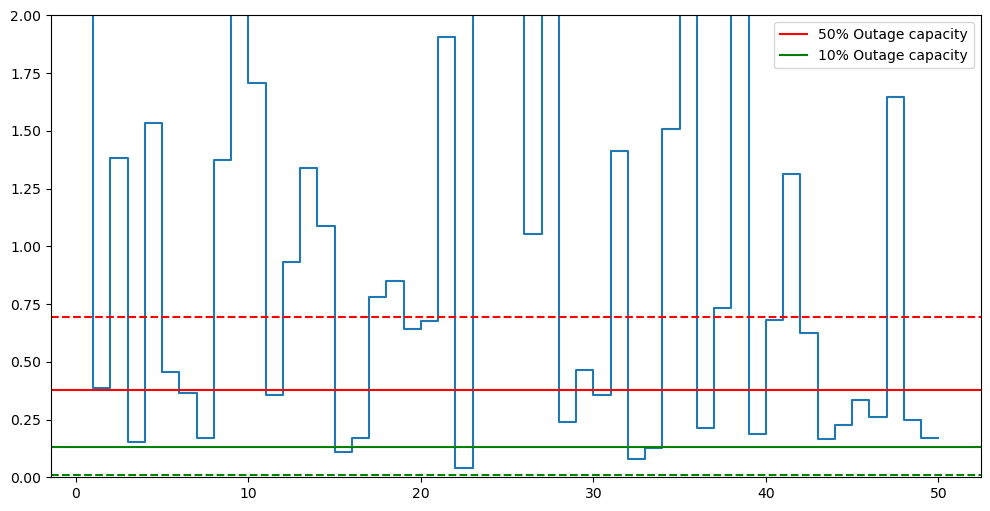

In [64]:
N = 50; # number of channel realizations that we draw
h = stats.expon.rvs(size = N); # the squared amplitude is exponentially distributed

fig, ax = plt.subplots(figsize = (12, 6)) # create a figure where we plot to
ax.step(np.linspace(1, N, N), h); # plot the channel realizations as a step function

# Plot the 50% outage capacity, i.e. maximum data rate under the assumption that 50% of packets are dropped
ax.axhline((1 - 0.5)*np.log2(1 - np.log(0.5)), color = "red", label = "50% Outage capacity")
ax.axhline(-np.log(0.5), color = "red", linestyle = "--") # required minimum SNR at the receiver

# Plot the 10% outage capacity, i.e. maximum data rate under the assumption that only 10% of packets are dropped
ax.axhline((1 - 0.1)*np.log2(1 - np.log(0.9)), color = "green", label = "10% Outage capacity")
ax.axhline(-np.log(0.99), color = "green", linestyle = "--") # required minimum SNR at the receiver

ax.set_ylim(0, 2)
plt.legend(loc='upper right');

Impact on delay 

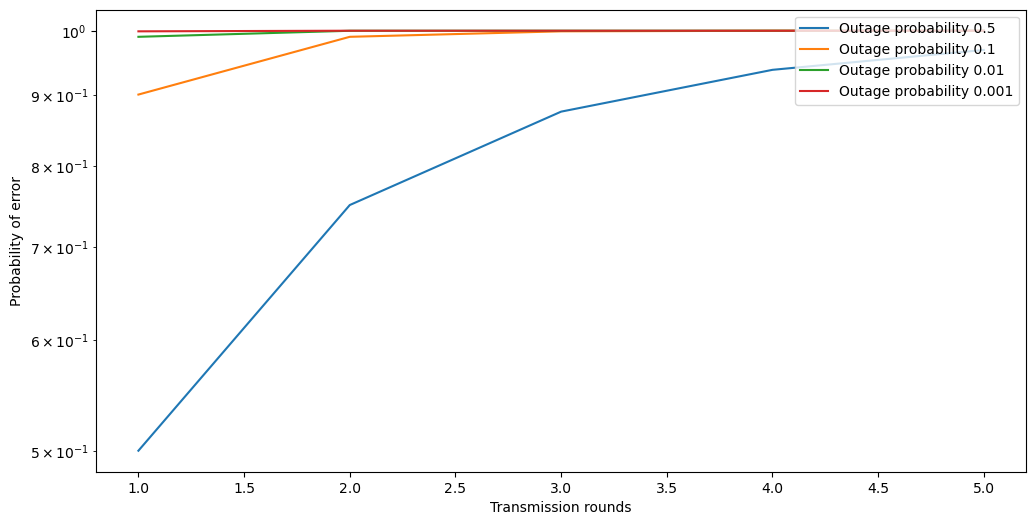

In [73]:
fig, ax = plt.subplots(figsize = (12, 6)) # create the figure where we plot to
N = np.linspace(1, 5, 5); # number of transmission rounds
plt.gca().set_yscale('log') # plot on logarithmic y-axis
for p in [0.5, 0.1, 0.01, 0.001]: # different outage probabilities
    plt.plot(N, 1 - p ** N, label = "Outage probability " + str(p)); # plot the expected final outage probability
plt.gca().set_xlabel("Transmission rounds")
plt.gca().set_ylabel("Probability of error")
plt.legend(loc='upper right');